## Test notebook used while implementing (refactoring) abstract nemesis node 


In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/notebooks


## Merging consecutive nodes 
A node contains a list of instruction wrappers -- in the abstract version this is represented by a nested list of latencies (a list of lists).  
The first operation is to merge nodes where possible -- define an operation **append_node(node)** to add node a to node b  
For the abstract node -- add the list of latencies in node a to the list in node b  
For the concrete node --

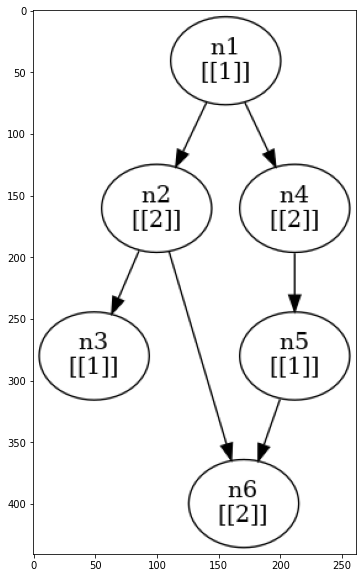

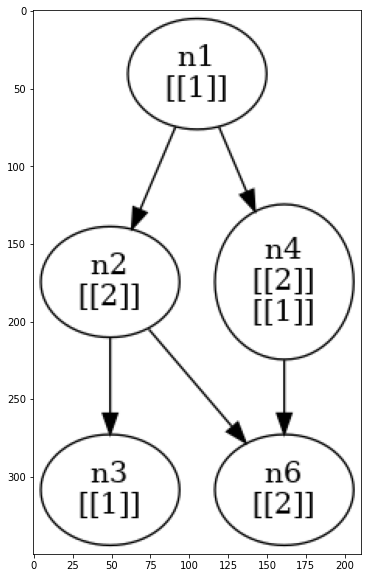

In [2]:
%autoreload 2
import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
from rwtools.nemesis.control_flow_graph import ControlFlowGraph
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

def to_png(graph, name="temp"):
    out_file = os.path.abspath(f"./{name}.dot")
    nx.drawing.nx_agraph.write_dot(graph, out_file)
    cmd = f"dot -Tpng {out_file} -o {name}.png"
    os.system(cmd)
    img = mpimg.imread(f"{name}.png")
    plt.figure(figsize = (10,10))
    plt.imshow(img)

    
G = nx.DiGraph()

n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")

n3 = AbstractNemesisNode([1], "n3")
n4 = AbstractNemesisNode([2], "n4")

n5 = AbstractNemesisNode([1], "n5")
n6 = AbstractNemesisNode([2], "n6")

nodes = [n1, n2, n3, n4, n5, n6]

G.add_nodes_from(nodes)

G.add_edge(n1, n2)
G.add_edge(n2, n3)
G.add_edge(n1, n4)
G.add_edge(n4, n5)
G.add_edge(n5, n6)
G.add_edge(n2, n6)
to_png(G)

cfg = ControlFlowGraph(nodes=nodes, graph=G)
# # cfg.nodes = [n1, n2]
# cfg.graph = G 

cfg.merge_consecutive_nodes()


to_png(G)



## Balancing nodes 
New operation: **balance_branching_node(node)** which balances a single node  



warning, no nop instruction found with latency 2
warning, no nop instruction found with latency 1
warning, no nop instruction found with latency 4
warning, no nop instruction found with latency 3


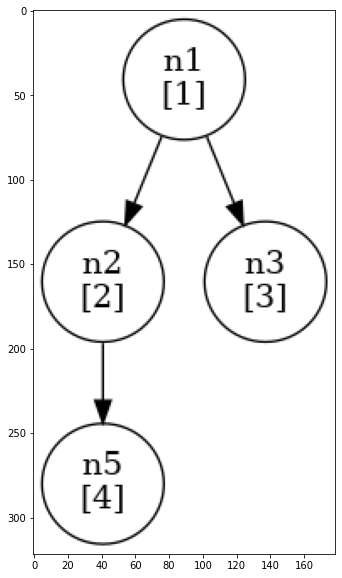

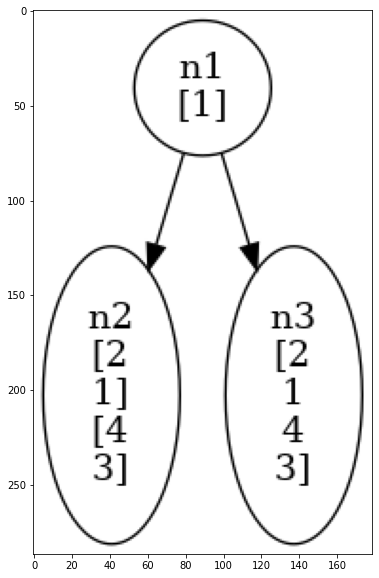

In [52]:
from rwtools.nemesis.graph.balance import balance_node_latencies 

G = nx.DiGraph()

n1 = AbstractNemesisNode(1, "n1")
n2 = AbstractNemesisNode(2, "n2")
n3 = AbstractNemesisNode(3, "n3")
n4 = AbstractNemesisNode(4, "n5")


nodes = [n1, n2, n3, n4]

G.add_nodes_from(nodes)

G.add_edge(n1, n2)
G.add_edge(n1, n3)
G.add_edge(n2, n4)
to_png(G)

cfg = ControlFlowGraph(nodes=nodes, graph=G)
# # cfg.nodes = [n1, n2]
# cfg.graph = G 

cfg.merge_consecutive_nodes()

n2.insert(1, "osidjfg", 1)
# balance_node_latencies(cfg.graph, n2, n3)
cfg.balance_branching_node(n1)

to_png(G)



warning, no nop instruction found with latency 2
warning, no nop instruction found with latency 1
warning, no nop instruction found with latency 3
warning, no nop instruction found with latency 2
warning, no nop instruction found with latency 3
warning, no nop instruction found with latency 5
warning, no nop instruction found with latency 4
warning, no nop instruction found with latency 4


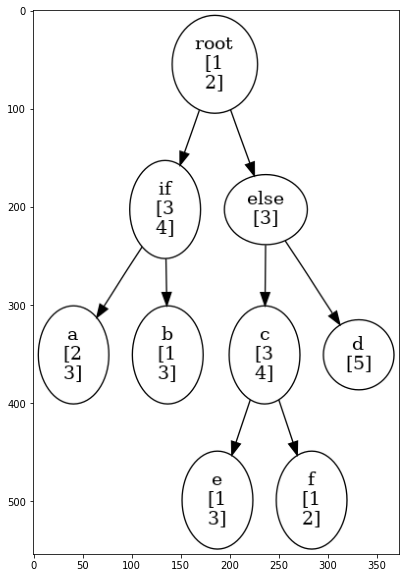

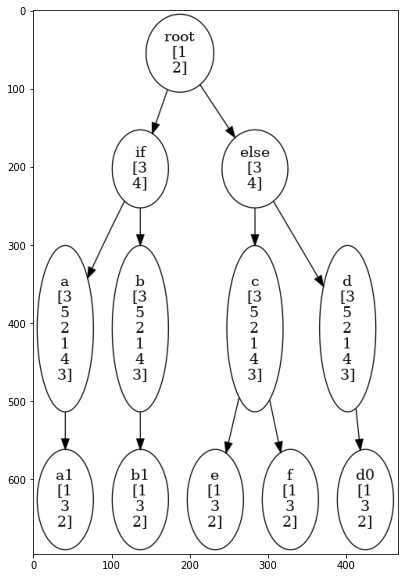

In [83]:
from itertools import zip_longest
import copy 
from rwtools.nemesis.graph.balance import balance_node_tree_latencies, balance_tree_latencies
        
root = AbstractNemesisNode([1,2], "root")
ifbranch = AbstractNemesisNode([3,4], "if")
elsebranch = AbstractNemesisNode([3], "else")

a = AbstractNemesisNode([2,3], "a")
b = AbstractNemesisNode([1,3], "b")

c = AbstractNemesisNode([3, 4], "c")
d = AbstractNemesisNode([5],  "d")

e = AbstractNemesisNode([1, 3], "e")
f = AbstractNemesisNode([1, 2], "f")


G = nx.DiGraph()
G.add_nodes_from([root, ifbranch, elsebranch, a, b, c, d, e, f])
G.add_edges_from([(root, ifbranch), (root, elsebranch), (ifbranch, a), (ifbranch, b), (elsebranch,c), 
                 (elsebranch, d), (c, e), (c, f)])

# to_png(G, "test3_pre_balance")
# balance_branching_point(G,  root)
# to_png(G, "test3")

to_png(G)

balance_tree_latencies(G, ifbranch, elsebranch)

to_png(G)
